## Bipolar Model

In [2]:
import numpy as np

from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [3]:
# s2theta = 0.916515138991;
# c2theta = np.sqrt(1 - s2theta**2);

s2theta = 0;
c2theta = np.sqrt(1 - s2theta**2);

In [4]:
def hamil_v(omegav=None):
    if omegav is None:
        omegav = -1
        
    return omegav * c2theta * np.array([0,0,-1]) + np.array([1,0,0]) * s2theta * omegav

In [5]:
def hamil_nunu(mu, fis, fisbar, alpha=None):
    if alpha is None:
        alpha = 1.0

    return mu*(fis-alpha*fisbar)

In [6]:
def bipolar_eom(sall, t, omegav, mu, alpha):

    s = sall[:3]
    sbar = sall[3:]

    hnunu = hamil_nunu(mu, s, sbar, alpha)
    h = hamil_v(omegav) + hnunu
    hbar = hamil_v(-1 * omegav) + hnunu

    dsdt = np.cross(h,s)
    dsbardt = np.cross(hbar,sbar)
    
    return np.concatenate((dsdt,dsbardt), axis=0)

In [21]:
pert = 1e-3
init = [pert, 0, 1, pert, 0,1]
t = np.linspace(0,5,10000)
parameters = (-1, 0.5, 1)

In [22]:
s = odeint(bipolar_eom, init, t, args=parameters, rtol=1e-12, atol=1e-14)

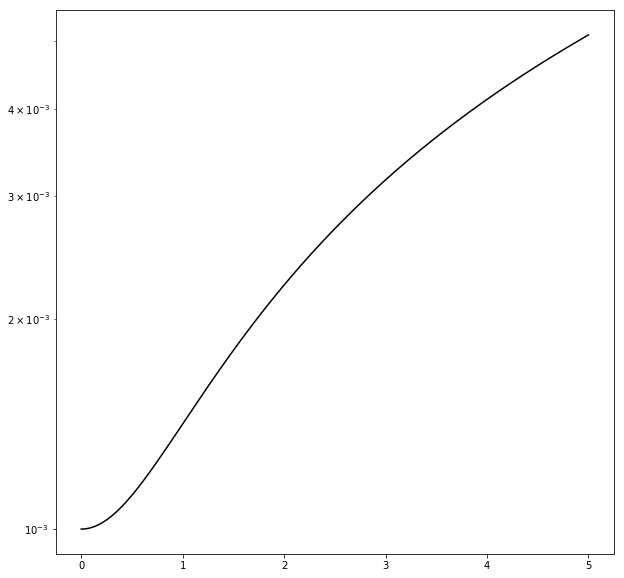

In [23]:
plt.figure(figsize=(10,10))

# plt.semilogy(t,s[:,0],'k-')
# plt.semilogy(t,s[:,2],'r-')
plt.semilogy(t,np.sqrt( s[:,0]**2 +s[:,1]**2 ),'k-')
# plt.semilogy(t,s[:,2]/2+0.5,'k--')
# plt.semilogy(t,np.sqrt( s[:,3]**2 +s[:,4]**2 ),'r-')
# plt.semilogy(t,s[:,5]/2+0.5,'r--')
plt.show()


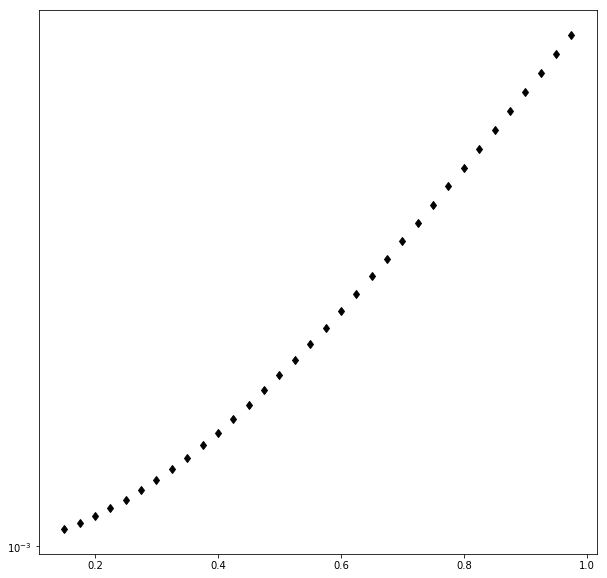

In [25]:
plt.figure(figsize=(10,10))
beg=300
edp=2000
seg=50
plt.semilogy(t[beg:edp:seg],np.sqrt( s[beg:edp:seg,0]**2 + s[beg:edp:seg,1]**2 ),'kd')
# plt.semilogy(t[beg:edp:seg], np.exp( 4*t[beg:edp:seg] ) )
# plt.semilogy(t[beg:edp],s[beg:edp,2],'rd')
plt.show()

In [14]:
slopefit,interceptfit = np.polyfit(t[beg:edp], np.log( np.sqrt( s[beg:edp,0]**2 + s[beg:edp,1]**2 ) ) , 1)
print(slopefit,interceptfit)

0.468409241194 -13.935229783


In [15]:
slopeth = np.sqrt((1-parameters[2])**2 * parameters[1]**2 + 4 * (1 + parameters[2]) * parameters[1] * parameters[0] + 4* parameters[0]**2 +0*1j) / 2
print(slopeth.imag)

0.0


In [16]:
slopefit/slopeth

/Users/leima/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/leima/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


(inf+nan*j)